# Evaluate portfolio

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Get stock information
- Utilize yahoo finance API
- https://pypi.org/project/yfinance/

## Stock code example
- American company: 'MSFT'
- Korean company: '005930.KS' (Samsung)
- Index: '^KS11'

## Search ticker symbol
- https://finance.yahoo.com/ 
- https://finance.naver.com/
- http://kind.krx.co.kr/corpgeneral/corpList.do?method=download  (Korea Exchange)

## Portfolio evaluation
- Comparison of Return, Risk, and Sharpe Ratio after composing an asset portfolio in several combinations
- Compare investment portfolios of American tech companies and Korean tech companies

---------------------

## Data load and visulization

In [52]:
Tech_US =['MSFT', 'NFLX', 'META', 'AMZN']   # Microsoft, Netflix, Facebook, Amazon
Tech_KR =['005930.KS','000660.KS','035420.KS', '035720.KS' ] #Samsung, SK hynix, Naver, Kakao 

In [46]:
yf.Ticker('MSFT').history(start='2018-04-01', end='2020-03-31')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-02,85.838394,86.227401,83.029932,83.988220,48515400,0.0,0
2018-04-03,84.993968,85.439907,83.390484,85.117310,37213800,0.0,0
2018-04-04,83.352508,88.011143,83.238656,87.603157,35560000,0.0,0
2018-04-05,87.707522,88.305267,86.720764,87.650589,29771900,0.0,0
2018-04-06,86.806153,87.726495,84.899061,85.610664,38026000,0.0,0
...,...,...,...,...,...,...,...
2020-03-24,140.527857,146.246736,138.103450,145.014969,82516700,0.0,0
2020-03-25,145.572169,150.870678,141.202364,143.626770,75638200,0.0,0
2020-03-26,145.073651,153.148515,145.044324,152.610840,64568100,0.0,0


In [53]:
# define a function to get price, dividends
def get_price(companies):
    df=pd.DataFrame()
    for company in companies:
        df[company]=yf.Ticker(company).history(start='2018-04-01', end='2020-03-31')['Close']
    return df

def get_div(companies):
    df=pd.DataFrame()
    for company in companies:
        df[company]=yf.Ticker(company).history(start='2018-04-01', end='2020-03-31')['Dividends']
    return df

In [54]:
# Stock prices of US, KR tech companies
p_US=get_price(Tech_US)
p_KR=get_price(Tech_KR)
p_KR.columns=['SS', 'SKH', 'NVR', 'KKO']
# Dividends from US and KR tech companies
d_US= get_div(Tech_US)
d_KR= get_div(Tech_KR)

In [58]:
d_US.sum()

MSFT    3.7
NFLX    0.0
META    0.0
AMZN    0.0
dtype: float64

In [56]:
d_KR.columns=['SS', 'SKH', 'NVR', 'KKO']
d_KR.sum()

SS     2832.0
SKH    2500.0
NVR     690.0
KKO      50.8
dtype: float64

<AxesSubplot:xlabel='Date'>

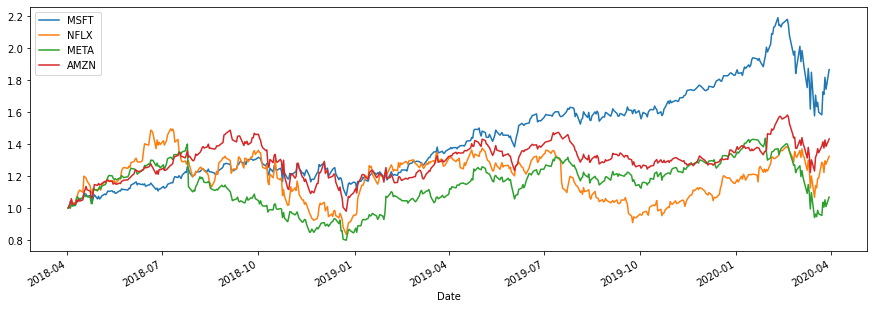

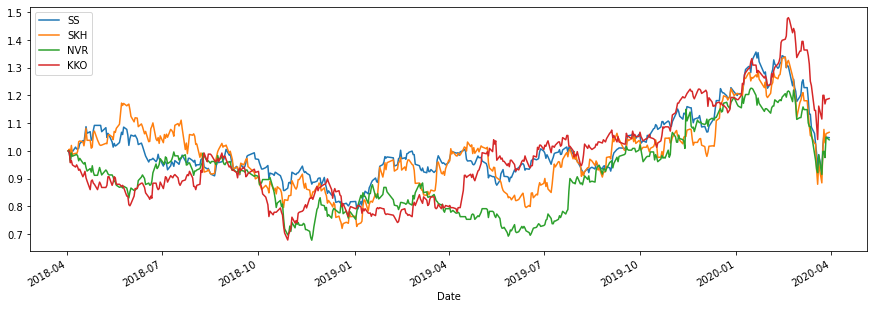

In [59]:
# plotting
(p_US/p_US.iloc[0]).plot(figsize=(15,5))
(p_KR/p_KR.iloc[0]).plot(figsize=(15,5))

--------------------

# Return calculation
(https://drive.google.com/uc?id=1ArzBrZPnNmoSuVjEMz0XXSr-4MreD3G5)

In [60]:
# Daily Return 
r_US=p_US/p_US.shift()-1 
r_KR=p_KR/p_KR.shift()-1 

In [61]:
# Average Return (Total period)
r_a_US=(p_US.iloc[-1]+d_US.sum())/p_US.iloc[0]-1
r_a_KR=(p_KR.iloc[-1]+d_KR.sum())/p_KR.iloc[0]-1

In [62]:
# Averate Return (Daily)
r_a_d_US=(1+r_a_US)**(1/p_US.shape[0])-1
r_a_d_KR=(1+r_a_KR)**(1/p_KR.shape[0])-1

In [63]:
print(p_US.shape[0])
print(p_KR.shape[0])

503
490


------------------------------

## Portfolio Returns

In [64]:
# Total portfolio return: Assume that the weights are 0.25, 0.25, 0.25, 0.25
weights=np.array([0.25, 0.25, 0.25, 0.25])
weights

array([0.25, 0.25, 0.25, 0.25])

In [65]:
r_a_US

MSFT    0.909059
NFLX    0.323486
META    0.067958
AMZN    0.431461
dtype: float64

In [66]:
port_return_US = np.dot(weights, r_a_US)
port_return_KR = np.dot(weights, r_a_KR)
port_return_KR

0.11216706222930756

In [67]:
print(port_return_US)
print(port_return_KR)

0.4329911066576077
0.11216706222930756


------------------------------------

## Portfolio Risk
(https://drive.google.com/uc?id=1CtgKMDEigvHpR2aiucmlPqddLADIhH23)


In [68]:
covar_US= r_US.cov()*252
covar_KR= r_KR.cov()*252

<AxesSubplot:>

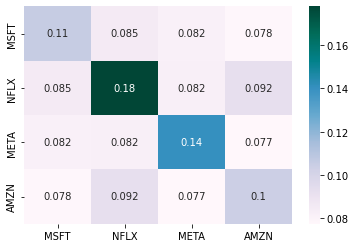

In [70]:
sns.heatmap(covar_US, cmap='PuBuGn', annot = True)

<AxesSubplot:>

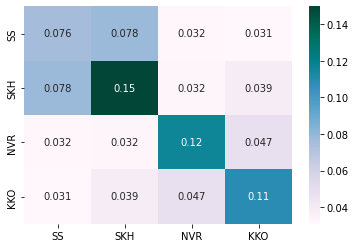

In [71]:
sns.heatmap(covar_KR, cmap='PuBuGn', annot = True)

In [72]:
port_risk_US= np.dot(weights.T, np.dot(covar_US, weights))
print(port_risk_US)
port_risk_KR= np.dot(weights.T, np.dot(covar_KR, weights))
print(port_risk_KR)

0.09504862541439174
0.060491338667087294


----------

## Sharpe ratio

In [73]:
rf=0.02
port_sr_US= (port_return_US-rf)/port_risk_US
port_sr_KR= (port_return_KR-rf)/port_risk_KR
print(port_sr_US)
print(port_sr_KR)

4.3450508080159445
1.523640644432534


--------

## Visualization


In [74]:
#                    KR     US 
# Return 
# Risk 
# sharpe ration

In [75]:
result=np.array([[port_return_KR, port_return_US], [port_risk_KR, port_risk_US], [port_sr_KR, port_sr_US]])
result=np.round(result, 3)

In [76]:
result=pd.DataFrame(result)
result.columns=['KR', 'US']
result.index=['Return', 'Risk', 'Sharpe ratio']
result

,KR,US
Return,0.112,0.433
Risk,0.060,0.095
Sharpe ratio,1.524,4.345


<AxesSubplot:>

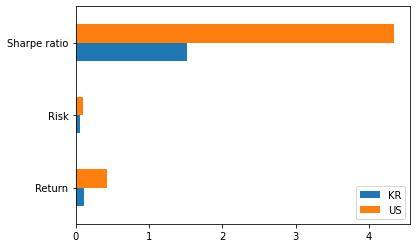

In [77]:
result.plot(kind='barh')